### <span style="color:#800000">Data Preprocessing</span>

### <span style="color:#FF00FF">Import libraries</span>

In [4]:
import pandas as pd
import numpy as np
import re
import html
import string
import unicodedata

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

pd.set_option('display.max_colwidth', 500)

### <span style="color:#FF00FF">Loading Datasets</span>

In [5]:
# Reading data and creating the dataframe 
job = pd.read_csv("../data/nakuri_jobdesc.csv")

# Checking the first 5 rows of the data
job.head()

,domain,link,title,company,experience,salary,location,description,role,industry_type,qualification,functional_area,employment_type,role_category,skills
0,information-technology-jobs,https://www.naukri.com/job-listings-head-information-technology-bright-consultant-delhi-ncr-15-to-25-years-150321905374?src=jobsearchDesk&sid=16164857916548527&xp=1&px=1,Head - Information Technology,Bright Consultant,15 - 25 years,Not Disclosed,Delhi / NCR,": - manage all it verticals of the company like it applications, infrastructure and security. - leverage it shared service organization for deployment of new it solutions - develop organization level it strategies in an as-is & to-be scenario and align to the business objectives in a cost-efficient manner - analyse existing it infrastructure and areas of improvements around hardware, operating system, communications, software applications, data processing, security system and implementing t...","Head/VP/GM-Technology(IT)/CTO,","Industrial Products, Heavy Machinery,","['UG :Any Graduate in Any Specialization', 'PG :Any Postgraduate in Any Specialization', 'Doctorate :Doctorate Not Required']","IT Software - Network Administration, Security,","Full Time, Permanent",Senior Management,"['Network Security', 'Information Security', 'Chief Information Security Officer', 'IT Security']"
1,information-technology-jobs,https://www.naukri.com/job-listings-urgent-opening-sr-executive-it-information-technology-ahmedabad-ecom-express-private-limited-ahmedabad-4-to-9-years-110321003742?src=jobsearchDesk&sid=16164857916548527&xp=2&px=1,Urgent Opening - Sr. Executive- IT (information Technology) -Ahmedabad,Ecom Express Private Limited,4 - 9 years,"₹ 2,50,000 - 4,50,000 P.A.",Ahmedabad,"hi, greetings from ecom express pvt ltd!!! we have an urgent opening for the post of sr. executive-it - ahmedabad job brief: ensure efficient operations of local area networks (lans) and wide area networks (wans). 1. provide user support & troubleshooting for seamless work 2. ensure efficient erp administration (user creation/deletion/modification/pod digitalization. 3. ensure proper e-mail administration (user creation/deletion/modification) 4. provide technical support (mobile app first m...","IT/Networking-Manager,","Courier, Transportation, Freight , Warehousing,",['UG :Any Graduate in Any Specialization'],"IT Software - Application Programming, Maintenance,","Full Time, Permanent",Admin/Maintenance/Security/Datawarehousing,"['LAN Troubleshooting', 'Hardware Networking', 'Networking', 'WAN', 'System Administration', 'Windows Troubleshooting', 'Information System', 'Desktop Support', 'Computer Hardware', 'Desktop Engineering', 'LAN', 'Network Administration', 'Information Technology', 'Windows System Administration']"
2,information-technology-jobs,https://www.naukri.com/job-listings-information-technology-it-business-solutions-manager-procter-gamble-mumbai-8-to-10-years-160321901115?src=jobsearchDesk&sid=16164857916548527&xp=3&px=1,Information Technology (IT) & Business Solutions Manager,Procter & Gamble,8 - 10 years,Not Disclosed,Mumbai,"do you want to join our team of women and men it professionals who apply their skills to bring groundbreaking, technology-based capabilities and business models to life? have you been looking to use and grow both your it and business skills? whether your role is to build a solution, craft an it innovation strategy for a business, cyber-protect our critical information systems and assets, or implement a project with a strategic supplier in our state of the art shared services organi...","Project Manager-IT/Software,","FMCG, Foods, Beverage,","['UG :BCA in Computers, B.Tech/B.E. in Computers, B.Sc in Computers', 'PG :M.Tech in Computers, MS/M.Sc(Science) in Computers, MCA in Computers']","IT Software - Application Programming, Maintenance,","Full Time, Permanent",Project Management,"['Application Development', 'Agile Project Management', 'Business Modeling', 'quality assurance', 'CI/CD', 'Soluti

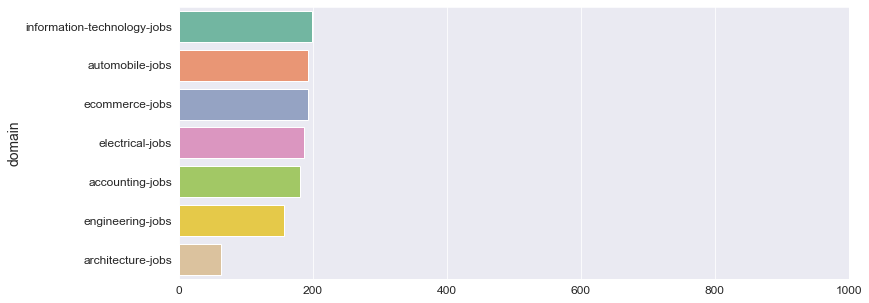

In [6]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12, 5))

# split() returns list of all the words in the string
roles = job['domain'].value_counts() 

sns.barplot(y=roles.index, x=roles.values, ax=ax, palette='Set2')
plt.xlim(0, 1000)
ax.set_ylabel('domain', fontsize=14)
ax.tick_params(labelsize=12)

In [8]:
# Reading data and creating the dataframe 
qa = pd.read_csv("../data/question_answers.csv")

# Checking the first 5 rows of the data
qa.head()

,roles,url,questions,answers
0,Account Manager,https://www.indeed.com/hire/interview-questions/account-manager?hl=en&co=IN,What qualities and skills will you bring to our company as an account manager?,"\r\nAn account manager will interact with your company’s clients on an ongoing basis. They should have strong communication skills and the ability to develop relationships with customers. Plus, a good candidate will be able to demonstrate that they can help your company increase revenue, retain clients and encourage new business. If your applicant can show that they have consistently met or exceeded their quotas, they may be an excellent choice.\r\nWhat to look for in an answer:\r\n\r\nA sen..."
1,Account Manager,https://www.indeed.com/hire/interview-questions/account-manager?hl=en&co=IN,"As an account manager, how would you handle a personality conflict with a client or colleague?",\r\nThis question aims at understanding the applicant’s interpersonal relationship skills as well as their ability to resolve conflict. An account manager must be able to demonstrate fairness and honesty when working with others while representing the values of your organization. They should accept people as they are and find creative ways to overcome differences while retaining their clients and serving them in a mutually beneficial relationship.\r\nWhat to look for in an answer:\r\n\r\nA r...
2,Account Manager,https://www.indeed.com/hire/interview-questions/account-manager?hl=en&co=IN,"Provide an example of a time you disappointed a client or colleague. As an account manager, how did you resolve the problem?","\r\nAll good account managers will inevitably disappoint a client on occasion, but they will also be willing to admit an error when it happens. A great applicant will be proactive to make sure that the same mistake does not happen again, especially to the same customer. This question will identify if your candidate is willing to accept responsibility and has the problem-solving skills to find solutions to common problems.\r\nWhat to look for in an answer:\r\n\r\nHumility and acknowledgment t..."
3,Account Manager,https://www.indeed.com/hire/interview-questions/account-manager?hl=en&co=IN,"Account managers have to juggle many responsibilities. On any given day, what does your workspace look like concerning organization?","\r\nAn account manager will be dealing with multiple clients at the same time. Organizational skills are vital. You want to hire a manager who keeps an organized and tidy workspace. If a client or colleague asks your account manager to provide important information, you don’t want them digging through a pile of paperwork to find it. They should have an organizational system that is neat and efficient.\r\nWhat to look for in an answer:\r\n\r\nDemonstration of effective organization\r\nA syste..."
4,Account Manager,https://www.indeed.com/hire/interview-questions/account-manager?hl=en&co=IN,"If you were your own client, how would you describe yourself as an account manager?","\r\nThis question can glean much information about your candidate, particularly their confidence as an account manager. Since the position requires a skill set similar to sales, self-assurance and poise could be the difference between an average manager who maintains the status quo and a dynamic manager who seeks to build the account. Your applicant should be able to express confidence in their ability to perform well.\r\nWhat to look for in an answer:\r\n\r\nConfidence in their ability with..."


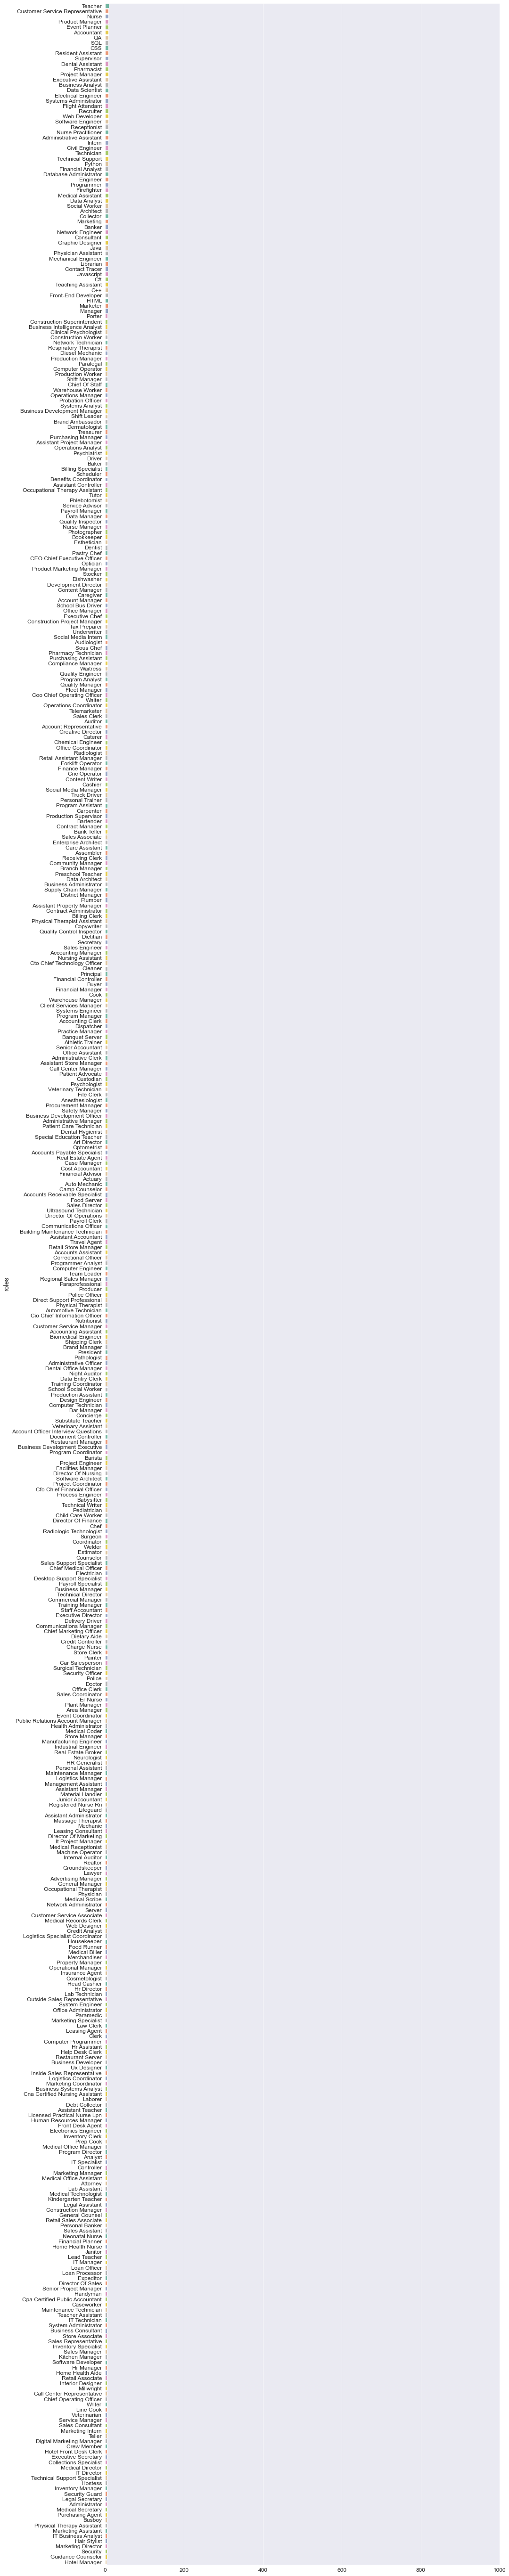

In [13]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15, 100))

# split() returns list of all the words in the string
roles = qa['roles'].value_counts() 

sns.barplot(y=roles.index, x=roles.values, ax=ax, palette='Set2')
plt.xlim(0, 1000)
ax.set_ylabel('roles', fontsize=14)
ax.tick_params(labelsize=12)

### <span style="color:#800000">Data Cleaning</span>

In [7]:
# This is a class te get text. 
class preprocessing:
    
    def __init__(self):
        pass

    #Cleaning and stripping HTML
    def remove_html_tags(self,text):
        clean = re.compile('<.*?>')
        cleantext = re.sub(clean, '', text)
        return cleantext

    #Removing Escaping characters &lt
    def escaping_html_char(self,doc):
        cleandoc = html.unescape(doc)
        return cleandoc
    
    #Removing newline & extra spaces
    def textcleaning(self,doc):
        # remove extra newlines
        a = doc.replace("\\n",".").strip()
        a = a.replace("\\r",".").strip()
        #a = re.sub(r'\d+','',a)# remove numbers
        cleandoc = re.sub("\s+"," ", a)
        return cleandoc
    
    def text_norm(self,doc):
        cleandoc = doc.lower()
        return cleandoc
    
    
    abbr_dict={
        "what's":"what is",
        "what're":"what are",
        "who's":"who is",
        "who're":"who are",
        "where's":"where is",
        "where're":"where are",
        "when's":"when is",
        "when're":"when are",
        "how's":"how is",
        "how're":"how are",

        "i'm":"i am",
        "we're":"we are",
        "you're":"you are",
        "they're":"they are",
        "it's":"it is",
        "he's":"he is",
        "she's":"she is",
        "that's":"that is",
        "there's":"there is",
        "there're":"there are",

        "i've":"i have",
        "we've":"we have",
        "you've":"you have",
        "they've":"they have",
        "who've":"who have",
        "would've":"would have",
        "not've":"not have",

        "i'll":"i will",
        "we'll":"we will",
        "you'll":"you will",
        "he'll":"he will",
        "she'll":"she will",
        "it'll":"it will",
        "they'll":"they will",

        "isn't":"is not",
        "wasn't":"was not",
        "aren't":"are not",
        "weren't":"were not",
        "can't":"can not",
        "couldn't":"could not",
        "don't":"do not",
        "didn't":"did not",
        "shouldn't":"should not",
        "wouldn't":"would not",
        "doesn't":"does not",
        "haven't":"have not",
        "hasn't":"has not",
        "hadn't":"had not",
        "won't":"will not"
    }

    def process_data(self,doc):
        for key, value in self.abbr_dict.items():
            doc = doc.replace(key,value)
        return doc

    # Removing accented characters
    # A simple example — converting é to e.
    def decode_text(self,doc):
        cleandoc = unicodedata.normalize('NFKD', doc).encode('ascii','ignore').decode("utf8")
        return cleandoc
    
    def text_tokenize(self,doc):
        return word_tokenize(doc)
    
    def remove_stopwords(self,words):
        # set of stop words
        stop_words = set(stopwords.words('english')) 
        stext = [] 
        for w in words:
            if w not in stop_words:
                stext.append(w)
        return stext
    
    def remove_punctuation(self,doc):
        #chars = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
        #table = str.maketrans(chars, ' '*len(chars))
        table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
        ##str.maketrans('', '', string.punctuation)
        cleandoc = doc.translate(table)
        return cleandoc
    
    
    def questions_clean(self,text):
        text = re.sub(r'\n+', '\n', text).strip()
        return text
    
    
    def data_preprocessing(self,doc,w_stop=True):

        doc = str(doc)

        step1 = self.remove_html_tags(doc)            # Cleaning and stripping HTML
        step2 = self.escaping_html_char(step1)        # Removing Escaping characters &lt
        step3 = self.textcleaning(step2)              # Removing newline & extra spaces
        step4 = self.text_norm(step3)                 # Case Normalization
        step5 = self.process_data(step4)              # Transforming abbreviations
        step6 = self.remove_punctuation(step5)        # Remove punctuation
        step7 = self.decode_text(step6)               # Text encoding - Removing accented characters
        step8 = self.text_tokenize(step7)             # Tokenization

        if w_stop:
            step11 = self.remove_stopwords(step8)
            cleandoc = " ".join(step11)
        else:
            cleandoc = " ".join(step8)

        return cleandoc

In [8]:
pre = preprocessing()
job['clean_description'] = job['description'].apply(pre.data_preprocessing,w_stop=True)
qa['answers'] = qa['answers'].apply(pre.questions_clean)

### <span style="color:#FF00FF">Export Dataset</span>

In [9]:
job.to_csv("../data/jobdescriptions_clean.csv",index=False)
qa.to_csv("../data/question_answers_clean.csv",index=False)